<a href="https://colab.research.google.com/github/AV-Gorshkov/SQL_netology.ru/blob/main/PY_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# импорт библиотек

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

# import sklearn.metrics as metrics
# from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# # увеличим размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 9, 5

# Задание_1
 Загрузите файл HR.csv в pandas dataframe

In [3]:
# 1. satisfaction_level - Уровень удовлетворенности работой
# 2. Last_evaluation - Время с момента последней оценки в годах
# 3. number_projects - Количество проектов, выполненных за время работы
# 4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
# 5. time_spend_company - Стаж работы в компании в годах
# 6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
# 7. left - уволился ли сотрудник
# 8. promotion_last_5years - повышался ли сотрудник за последние пять лет
# 9. department - отдел в котором работает сотрудник
# 10. salary - относительный уровень зарплаты

param = r'/content/drive/My Drive/Нетология/PY_Статистика/дз/итог/'

file = 'HR.csv'

df_hr = pd.read_csv(f'{param}{file}', sep = ',')

df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Изучим данные:
# 1) общая информация по всему Датафрейму

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# 2) описание по категориальным столбцам

for column in df_hr[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']]:
  print(f"{column}: {df_hr[column].unique()}")

Work_accident: [0 1]
left: [1 0]
promotion_last_5years: [0 1]
department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary: ['low' 'medium' 'high']


In [6]:
#  приведем данные к одному регистру
df_hr['department'] = df_hr['department'].str.capitalize()
df_hr['salary'] = df_hr['salary'].str.capitalize()

df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,0.37,0.52,2,159,3,0,1,0,Sales,Low


# Задание_2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [7]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
print("Значение моды: ")
for column in df_hr.columns.tolist():
  print( f"{column}: {df_hr[column].mode()[0]}")

Значение моды: 
satisfaction_level: 0.1
last_evaluation: 0.55
number_project: 4
average_montly_hours: 135
time_spend_company: 3
Work_accident: 0
left: 0
promotion_last_5years: 0
department: Sales
salary: Low


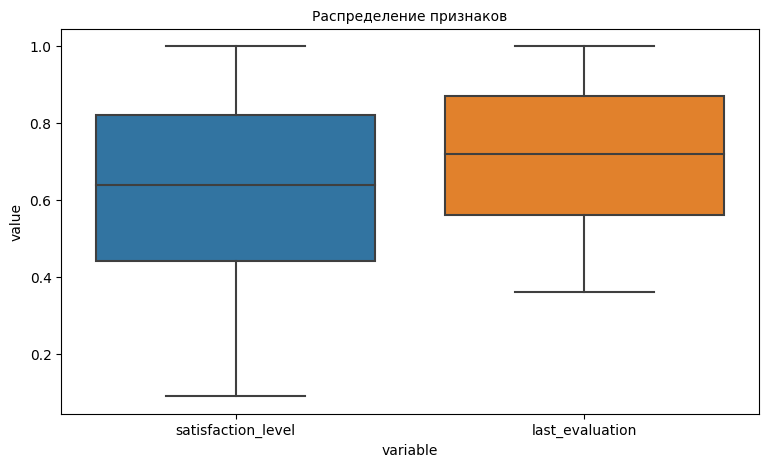

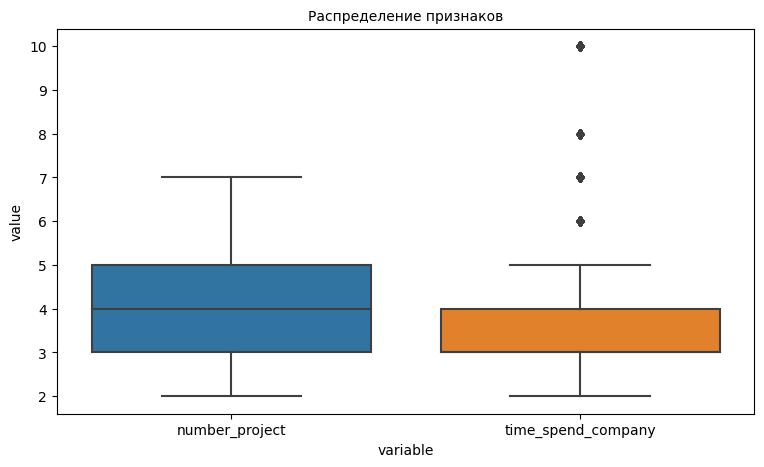

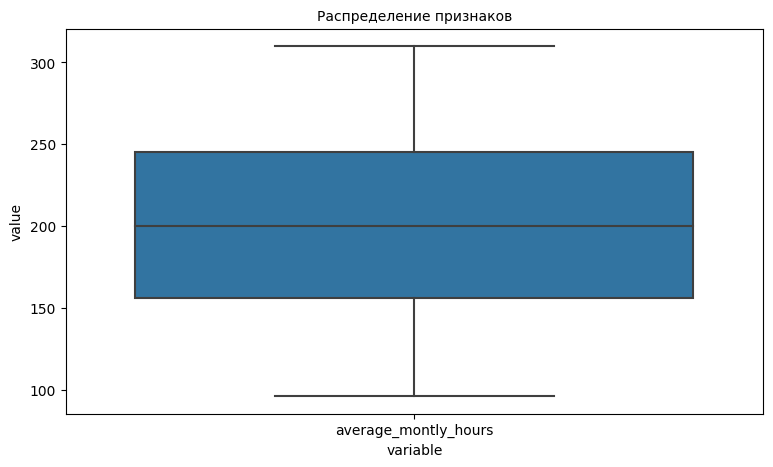

In [9]:
# Статистически показатели по различным признакам, на основе диаграммы Boxplot:

sns.boxplot( x="variable", y="value", data=pd.melt(df_hr[['satisfaction_level', 'last_evaluation']]) )
plt.title("Распределение признаков", fontsize=10)
plt.show()

sns.boxplot( x="variable", y="value", data=pd.melt(df_hr[[ 'number_project', 'time_spend_company']]) )
plt.title("Распределение признаков", fontsize=10)
plt.show()

sns.boxplot( x="variable", y="value", data=pd.melt(df_hr[['average_montly_hours']]) )
plt.title("Распределение признаков", fontsize=10)
plt.show()

# Задание_3
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных. Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [10]:
#  корреляционная матрица
# 1. коэфф Пирсона

df_corr_pirs = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company','average_montly_hours']].corr()
df_corr_pirs.style.background_gradient(cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,time_spend_company,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.142970,-0.100866,-0.020048
last_evaluation,0.105021,1.000000,0.349333,0.131591,0.339742
number_project,-0.142970,0.349333,1.000000,0.196786,0.417211
time_spend_company,-0.100866,0.131591,0.196786,1.000000,0.127755
average_montly_hours,-0.020048,0.339742,0.417211,0.127755,1.000000


In [11]:
# 2. коэфф Спирмана

df_corr_spear = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company','average_montly_hours']].corr(method='spearman')
df_corr_spear.style.background_gradient(cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,time_spend_company,average_montly_hours
satisfaction_level,1.000000,0.162407,0.005786,-0.139428,0.062000
last_evaluation,0.162407,1.000000,0.350399,0.161154,0.342061
number_project,0.005786,0.350399,1.000000,0.251971,0.397855
time_spend_company,-0.139428,0.161154,0.251971,1.000000,0.168750
average_montly_hours,0.062000,0.342061,0.397855,0.168750,1.000000


In [12]:
# 3. коэфф Кенделла

df_corr_kend = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company','average_montly_hours']].corr(method='kendall')
df_corr_kend.style.background_gradient(cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,time_spend_company,average_montly_hours
satisfaction_level,1.000000,0.113865,0.022077,-0.110005,0.051126
last_evaluation,0.113865,1.000000,0.266267,0.118842,0.235374
number_project,0.022077,0.266267,1.000000,0.195025,0.306987
time_spend_company,-0.110005,0.118842,0.195025,1.000000,0.119466
average_montly_hours,0.051126,0.235374,0.306987,0.119466,1.000000


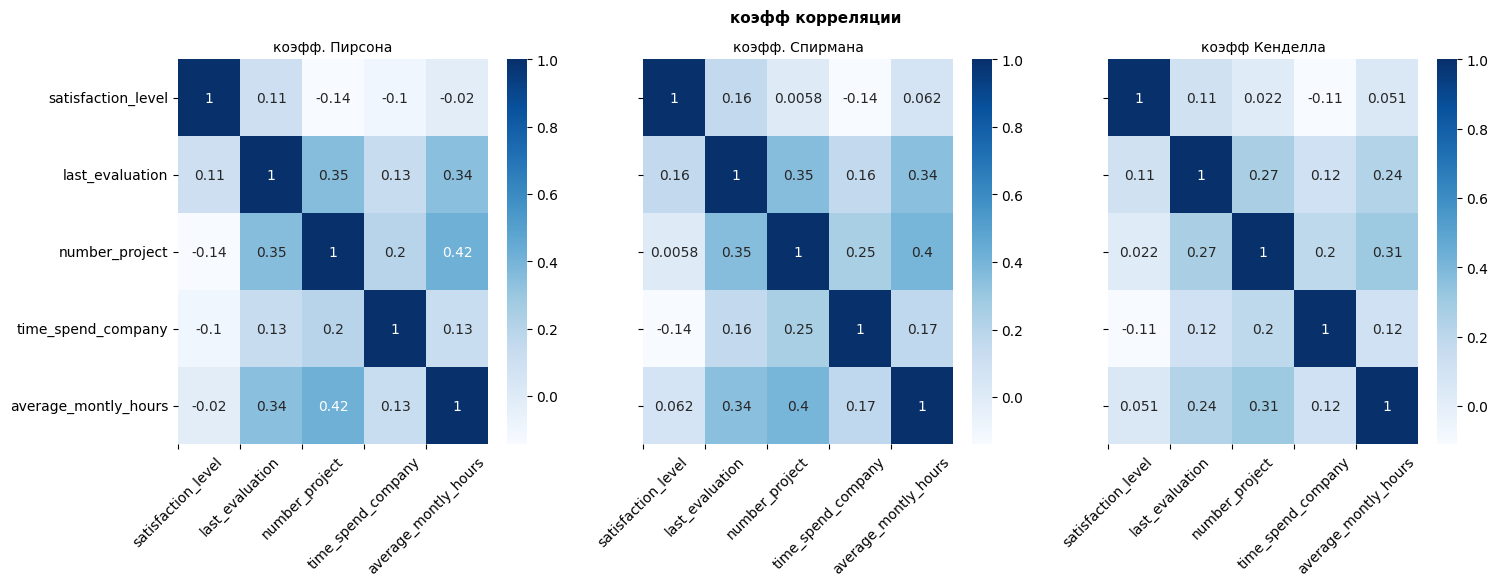

In [13]:
#  визуализируем количестенные признаки

fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize = [17,5] )

plt.suptitle('коэфф корреляции', fontsize=11, fontweight='bold')

plt.subplots_adjust(wspace= 0.2)

plt.subplot(1, 3, 1)
sns.heatmap(df_corr_pirs, annot=True,cmap="Blues")
plt.xticks( range(df_corr_pirs.shape[1]), df_corr_pirs.columns, rotation=45)
plt.title('коэфф. Пирсона',fontsize=10)

plt.subplot(1, 3, 2)
sns.heatmap(df_corr_spear, annot=True,  cmap="Blues")
plt.xticks( range(df_corr_spear.shape[1]), df_corr_spear.columns, rotation=45)
plt.title('коэфф. Спирмана',fontsize=10)

plt.subplot(1, 3, 3)
sns.heatmap(df_corr_kend, annot=True, cmap="Blues")
plt.xticks( range(df_corr_kend.shape[1]), df_corr_kend.columns, rotation=45)
plt.title('коэфф Кенделла',fontsize=10)

plt.show()

Наиболее скоррелированные переменные:
  * Cр. кол-во часов на рабочем месте в месяц & Кол-во проектов, выполненных за время работы (average_montly_hours & number_project)
  * Время с момента последней оценки в годах & Кол-во проектов, выполненных за время работы (last_evaluation & number_project)
Мене скоррелированные переменные:
  * Cр. кол-во часов на рабочем месте в месяц & Уровень удовлетворенности работой (average_montly_hours & satisfaction_level)
  * Cр. кол-во часов на рабочем месте в месяц & Стаж работы в компании в годах (average_montly_hours & time_spend_company)

# Задание_4
Рассчитайте сколько сотрудников работает в каждом департаменте

In [14]:
df_depart = df_hr[df_hr['left'] == 0]['department'].value_counts()

df_depart.head(10)

Sales          3126
Technical      2023
Support        1674
It              954
Product_mng     704
Randd           666
Marketing       655
Accounting      563
Management      539
Hr              524
Name: department, dtype: int64

# Задание_5
Показать распределение сотрудников по зарплатам.

In [15]:
df_salary = df_hr[df_hr['left'] == 0].groupby('salary')[['left']].count().rename(columns={'left':'employees'})

df_salary.head(3)

,employees
salary,
High,1155
Low,5144
Medium,5129


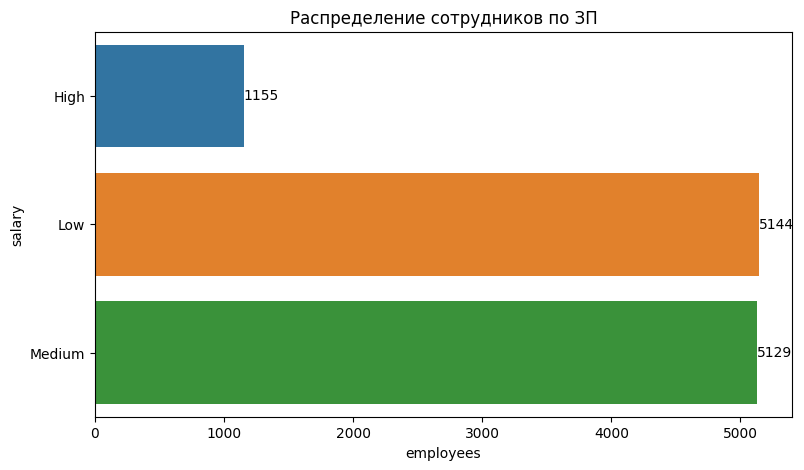

In [16]:
ax = sns.barplot( x='employees',
                  y='salary',
                  data=df_salary.reset_index())
plt.title("Распределение сотрудников по ЗП", fontsize=12)
for i in ax.containers:
  ax.bar_label(i,)

# Задание_6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [17]:
df_dep_salary = df_hr[df_hr['left'] == 0].groupby(['department','salary'])[['left']].count()\
                .sort_values(['department','salary'], ascending=True).rename(columns={'left':'employees'}).reset_index()

df_dep_salary.head(15)

,department,salary,employees
0,Accounting,High,69
1,Accounting,Low,259
2,Accounting,Medium,235
3,Hr,High,39
4,Hr,Low,243
5,Hr,Medium,242
6,It,High,79
7,It,Low,437
8,It,Medium,438
9,Management,High,224


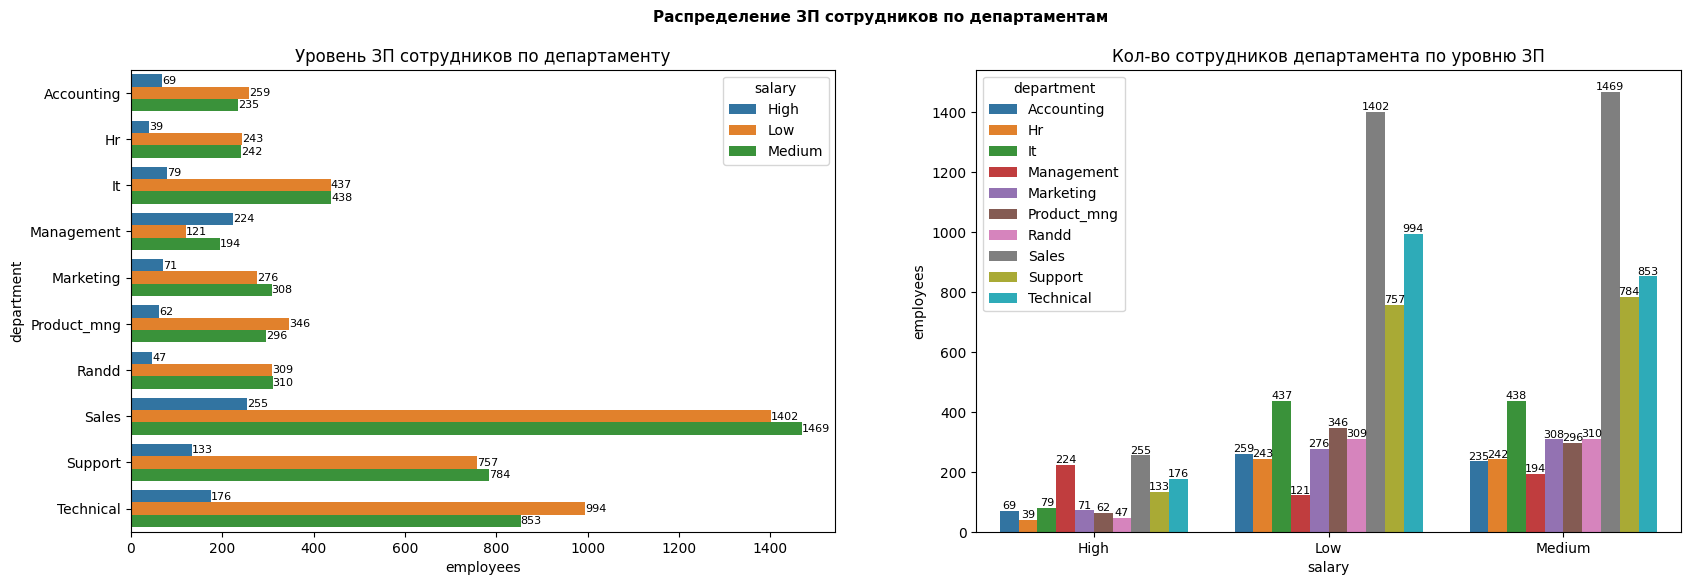

In [20]:
plt.figure(figsize = (20,6))
plt.suptitle('Распределение ЗП сотрудников по департаментам', fontsize=11, fontweight='bold')

plt.subplot(1, 2, 1)
ax = sns.barplot( x='employees',
                  y='department',
                  hue='salary',
                  data=df_dep_salary.reset_index())
plt.title("Уровень ЗП сотрудников по департаменту", fontsize=12)
for i in ax.containers:
  ax.bar_label(i, fontsize=8)

plt.subplot(1, 2, 2)
ax = sns.barplot( x='salary',
                  y='employees',
                  hue='department',
                  data=df_dep_salary.reset_index())
plt.title("Кол-во сотрудников департамента по уровню ЗП", fontsize=12)
for i in ax.containers:
  ax.bar_label(i, fontsize=8)

plt.show()

# Задание_7
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [85]:
# Формирование выборок:

df_high = df_hr[ df_hr['salary'] =='High']['average_montly_hours']
df_low = df_hr[ df_hr['salary'] =='Low']['average_montly_hours']


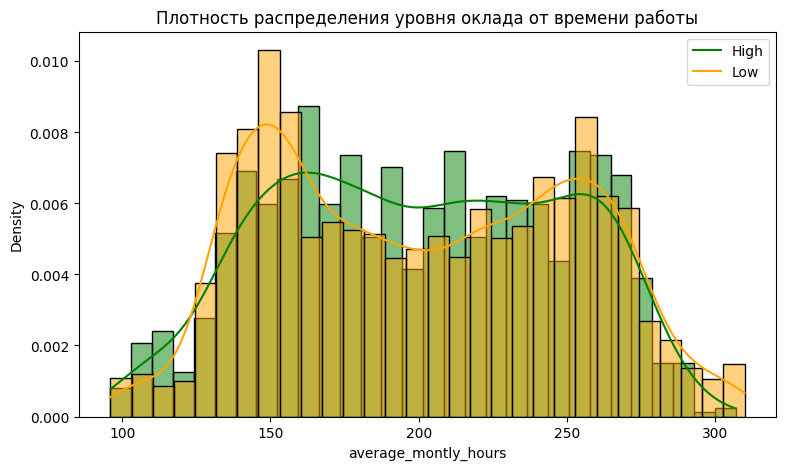

In [84]:
# Визуализация доверительных интервалов:

sns.histplot(df_high, kde=True, bins=30, stat="density", color='green')
sns.histplot(df_low, kde=True, bins=30, stat="density", color='orange')
plt.title('Плотность распределения уровня ЗП сотрудников от времени работы')
plt.legend(['High', 'Low'])

plt.show()

Из графика видно, что распределения выбранных параметров схожи.
Сформируем и проверим гипотезу:
 - H0 - время работы сотрудников с высоким уровнем ЗП от значимо отличается от времени работы сотрудников с низким уровнем ЗП,
 - Н1 - время работы сотрудников с высоким уровнем ЗП от значимо не отличается от времени работы сотрудников с низким уровнем ЗП .
 Проведем Т-тест по t-критерию Стьюдента.

In [90]:
alpha = 0.05  # уровень значимости

resutl_AB = ttest_ind(df_high, df_low )
print('p-value: %.8f' % resutl_AB.pvalue)

p-value: 0.46610235


p_value больше уровня значимости - отвергаем гипотезу Н0. Т.е. время работы сотрудников значимо не различается по уровню ЗП.

# Задание_8
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
  - Доля сотрудников с повышением за последние 5 лет
  - Средняя степень удовлетворенности
  - Среднее количество проектов

In [45]:
#  Доля сотрудников с повышением за последние 5 лет

df_left = df_hr.groupby(['left', 'promotion_last_5years'])[['left']].count().rename(columns={'left':'employees'}).reset_index()

df_left['% среди всех сотрудников']  = 100 * df_left['employees']/df_left['employees'].sum()

df_left['% среди группы Left'] = 100 * df_left['employees'] / df_left.groupby(['left'])['employees'].transform( 'sum' )

df_left.head()

,left,promotion_last_5years,employees,% среди всех сотрудников,% среди группы Left
0,0,0,11128,74.191613,97.374869
1,0,1,300,2.000133,2.625131
2,1,0,3552,23.681579,99.467936
3,1,1,19,0.126675,0.532064


In [48]:
# Средняя степень удовлетворенности:
# Среднее количество проектов:

df_hr.groupby(['left']). agg({'satisfaction_level': 'mean', 'number_project': 'mean'}).reset_index().head()

,left,satisfaction_level,number_project
0,0,0.666810,3.786664
1,1,0.440098,3.855503


# Задание_9
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).
Оценить качество модели на тестовой выборки

In [126]:
# Формирование выбороки:

df_lda = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years' ]]

df_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [208]:
#  Построим модель линейной регрессии, предсказывающую уволился ли сотрудник на основе имеющихся признаков:

X = df_lda[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years' ]]
y = pd.array(df_lda['left'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)

In [209]:
# коэфф модели

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print(f'коэфф модели:\n{lda.coef_[0]}')

коэфф модели:
[-4.1273853   1.02982556 -0.27175552  0.00532308  0.26542548 -0.83808047
 -1.25288087]


In [210]:
# значение полученные с помощью модели:

y_pred = lda.predict(X_test)
print(f' y_pred = {y_pred}')

 y_pred = [0 0 0 ... 1 0 0]


In [224]:
df_result = pd.DataFrame( [y_test, y_pred]).transpose()
df_result.head(10)

,0,1
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,1


In [226]:
# Рассчитаем ошибку для полученной модели
accuracy_score(y_test, y_pred)

0.7677333333333334

In [230]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7932  642]
 [1971  705]]


# Задание_10
Загрузить jupyter notebook с решение на github и прислать ссылку